In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
# import data
df_og = pd.read_csv(r'../data/processed/Cargo Theft 2020.csv')
df_og

,Year-Quarter,Day,Date,City,State,"City, ST",Country,Commodity,Value,Type of Loss,Location,Additional Information,Recovery?,Time,General Category
0,2020-Q1,Wednesday,1/1/20,Garland,TX,"Garland, TX",USA,Motor oil,100000.0,Cargo theft,Secure yard,No additional details,NaN,Overnight,Automobile & Parts
1,2020-Q1,Wednesday,1/1/20,Memphis,TN,"Memphis, TN",USA,Gas cylinders,10000.0,Pilferage,Truck stop/Gas station,No additional details,NaN,Overnight,Construction & Industrial goods
2,2020-Q1,Wednesday,1/1/20,Ocala,FL,"Ocala, FL",USA,Televisions,137000.0,Cargo theft,Secure yard,No additional details,NaN,Overnight,Consumer electronics
3,2020-Q1,Wednesday,1/1/20,South Holland,IL,"South Holland, IL",USA,Cell phones,100000.0,Cargo theft,Truck stop/Gas station,East Tollway,NaN,NaN,Consumer electronics
4,2020-Q1,Friday,1/3/20,Zion,IL,"Zion, IL",USA,Mixed goods,NaN,Seal break,Truck stop/Gas station,Russel Rd,No loss,Overnight,Mixed cargo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,2020-Q3,Sunday,8/30/20,NaN,TN,", TN",USA,Soft drinks,NaN,Cargo theft,Unspecified,No additional details,NaN,NaN,Food & Drinks
479,2020-Q3,Sunday,8/30/20,NaN,TX,", TX",USA,Tires,NaN,Cargo theft,Unspecified,17 & 19 inch,NaN,NaN,Automobile & Parts
480,2020-Q3,Tuesday,9/1/20,NaN,TX,", TX",USA,Tools,NaN,Pilferage,Truck stop/Gas station,No additional details,NaN,NaN,Construction & Industrial goods
481,2020-Q3,Tuesday,9/1/20,NaN,ON,", ON",CAN,Mixed cargo,NaN,Pilferage,Truck stop/Gas station,No additional details,NaN,NaN,Mixed cargo


In [84]:
# copy df
df = df_og.copy()

<AxesSubplot:>

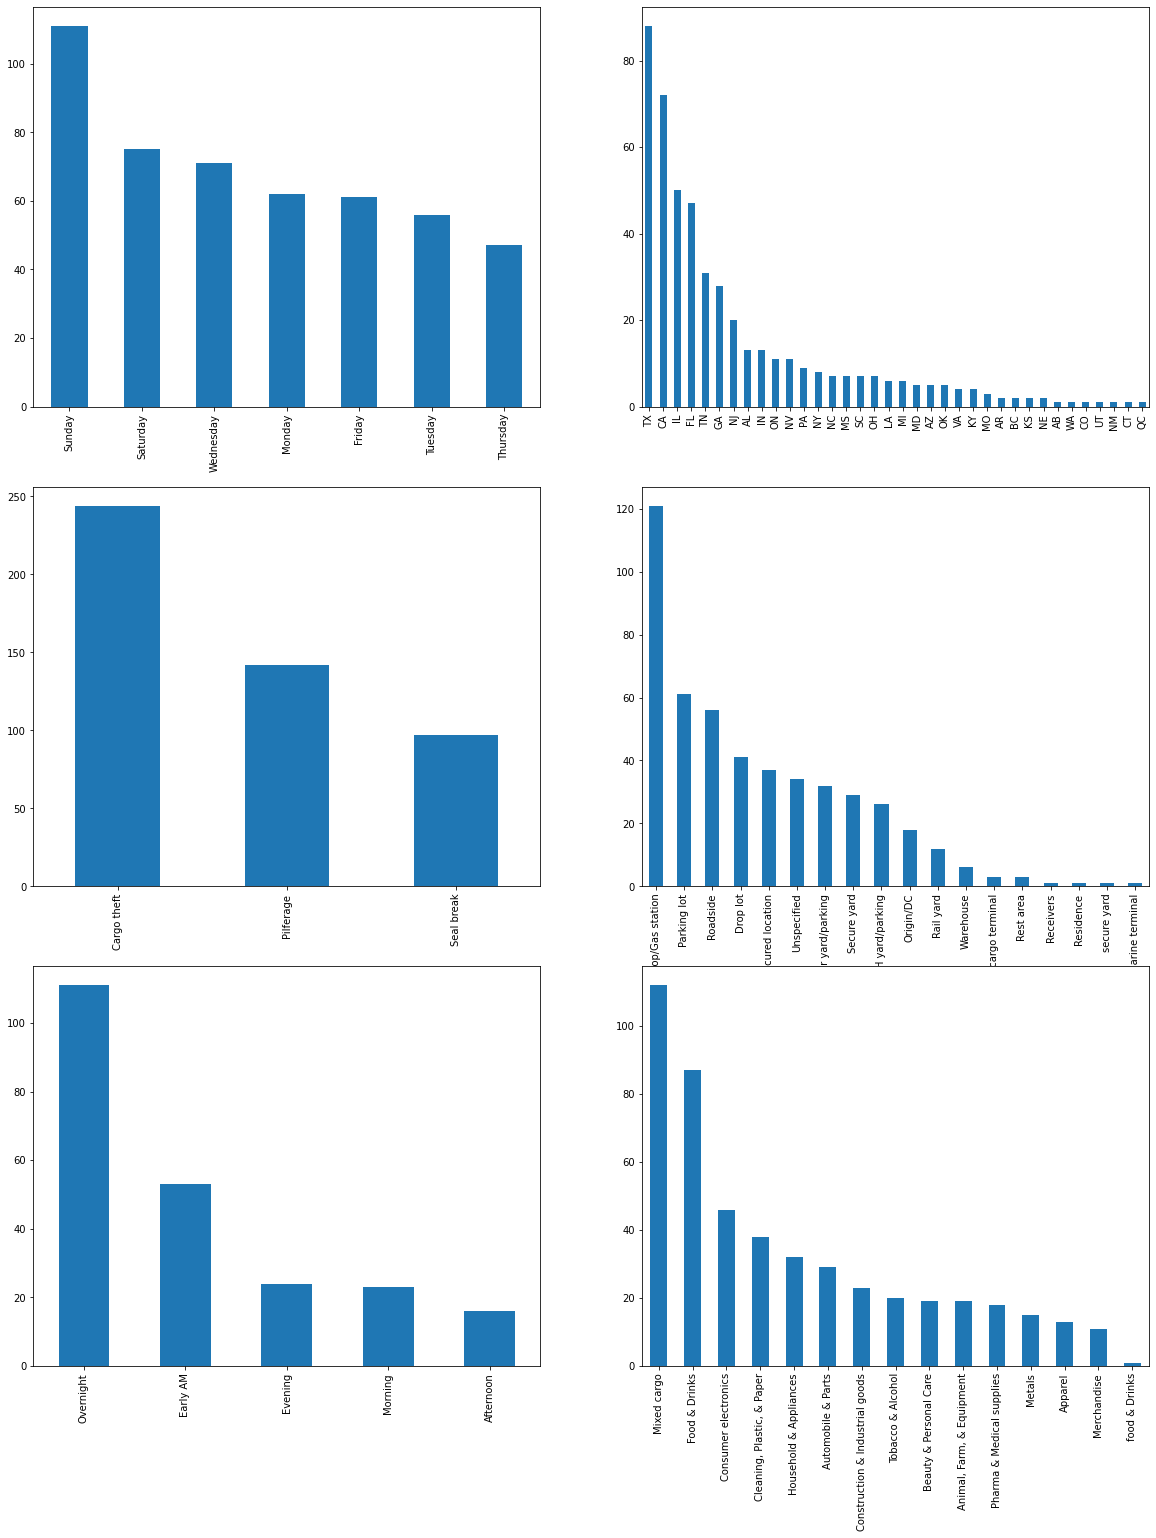

In [85]:
# data overview
fig, [[ax1, ax2],[ax3, ax4], [ax5, ax6]] = plt.subplots(3,2,figsize=(20,25))

pd.value_counts(df['Day']).plot(kind='bar', ax=ax1)
pd.value_counts(df['State']).plot(kind='bar', ax=ax2)
pd.value_counts(df['Type of Loss']).plot(kind='bar', ax=ax3)
pd.value_counts(df['Location']).plot(kind='bar', ax=ax4)
pd.value_counts(df['Time']).plot(kind='bar', ax=ax5)
pd.value_counts(df['General Category']).plot(kind='bar', ax=ax6)

<AxesSubplot:xlabel='State'>

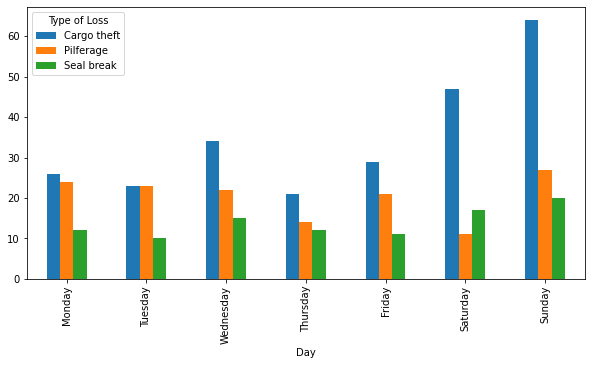

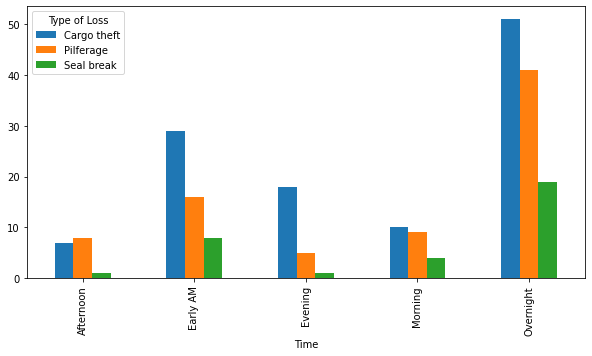

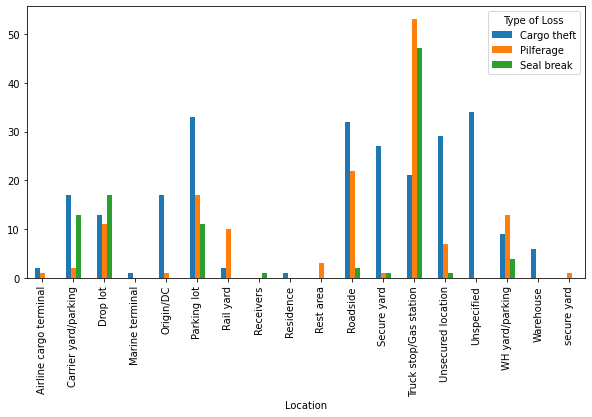

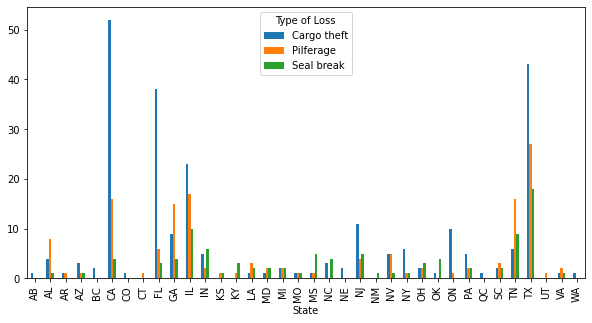

In [86]:
# type of loss v.s. time
# group by weekdays & type of loss
fig, ax = plt.subplots(figsize=(10,5))
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df.groupby(['Day','Type of Loss']).count()['Date'].unstack().reindex(weekdays).plot(kind = 'bar', ax=ax)

# group by time & type of loss
fig, ax = plt.subplots(figsize=(10,5))
df.groupby(['Time','Type of Loss']).count()['Date'].unstack().plot(kind = 'bar', ax=ax)


# type of loss v.s. places
# group by location & type of loss
fig, ax = plt.subplots(figsize=(10,5))
df.groupby(['Location','Type of Loss']).count()['Date'].unstack().plot(kind = 'bar', ax=ax)


# group by states & type of loss
fig, ax = plt.subplots(figsize=(10,5))
df.groupby(['State','Type of Loss']).count()['Date'].unstack().plot(kind = 'bar', ax=ax)


In [77]:
# try drop nan
df_dropped = df[df['Value'].notna()]

In [88]:
# value: change str to int
df['Value'] = df['Value'].astype(float)

In [90]:
# encoding
# day = {'Monday': 1, 'Tuesday': 2, 'wednesday': 3, 'thursday': 4, 'friday': 5, 'saturday': 6 , 'sunday': 7}
# category = {'animal, farm, & equipment': 11, 'apparel': 12, 'automobile & parts': 13, 'beauty & personal care': 14, 
#             'cleaning, plastic, & paper': 15, 'construction & industrial goods': 16, 'consumer electronics': 17, 
#             'currency & firearms': 18, 'food & drinks': 19, 'household & appliances': 20, 'merchandise': 21,
#             'metals': 22, 'mixed cargo': 23, 'pharma & medical supplies': 24, 'tobacco & alcohol': 25}
# location = {'airline cargo terminal': 31, 'carrier yard/parking': 32, 'drop lot': 33, 'marine terminal': 34, 
#             'origin/dc': 35, 'parking lot': 36, 'rail yard': 37, 'receivers': 38, 'residence': 39, 'rest area':40,
#             'roadside': 41, 'secure yard': 42, 'truck stop/gas station': 43, 'unsecured location': 44, 
#             'unspecified': 45, 'warehouse': 46, 'wh yard/parking': 47}
# loss = {'cargo theft': 51, 'pilferage': 52, 'seal break': 53}
# time = {'overnight': 61, 'early am': 62, 'evening': 63, 'morning': 64, 'afternoon': 65}

df['Day'] =df['Day'].astype('category').cat.codes
df['General Category'] =df['General Category'].astype('category').cat.codes
df['Location'] =df['Location'].astype('category').cat.codes
df['Type of Loss'] =df['Type of Loss'].astype('category').cat.codes
df['Time'] =df['Time'].astype('category').cat.codes


# replace to numerical value
# df_new = df.replace({'Day': day, 'General Category': category, 'Location': location, 'Type of Loss': loss, 
#                      'Time': time})

In [91]:
df

,Year-Quarter,Day,Date,City,State,"City, ST",Country,Commodity,Value,Type of Loss,Location,Additional Information,Recovery?,Time,General Category
0,2020-Q1,6,1/1/20,Garland,TX,"Garland, TX",USA,Motor oil,100000.0,0,11,No additional details,NaN,4,2
1,2020-Q1,6,1/1/20,Memphis,TN,"Memphis, TN",USA,Gas cylinders,10000.0,1,12,No additional details,NaN,4,5
2,2020-Q1,6,1/1/20,Ocala,FL,"Ocala, FL",USA,Televisions,137000.0,0,11,No additional details,NaN,4,6
3,2020-Q1,6,1/1/20,South Holland,IL,"South Holland, IL",USA,Cell phones,100000.0,0,12,East Tollway,NaN,-1,6
4,2020-Q1,0,1/3/20,Zion,IL,"Zion, IL",USA,Mixed goods,NaN,2,12,Russel Rd,No loss,4,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,2020-Q3,3,8/30/20,NaN,TN,", TN",USA,Soft drinks,NaN,0,14,No additional details,NaN,-1,7
479,2020-Q3,3,8/30/20,NaN,TX,", TX",USA,Tires,NaN,0,14,17 & 19 inch,NaN,-1,2
480,2020-Q3,5,9/1/20,NaN,TX,", TX",USA,Tools,NaN,1,12,No additional details,NaN,-1,5
481,2020-Q3,5,9/1/20,NaN,ON,", ON",CAN,Mixed cargo,NaN,1,12,No additional details,NaN,-1,11


In [92]:
df.dtypes

Year-Quarter               object
Day                          int8
Date                       object
City                       object
State                      object
City, ST                   object
Country                    object
Commodity                  object
Value                     float64
Type of Loss                 int8
Location                     int8
Additional Information     object
Recovery?                  object
Time                         int8
General Category             int8
dtype: object

                       Day  General Category  Location  Type of Loss  \
Day               1.000000         -0.005276 -0.035280      0.023338   
General Category -0.005276          1.000000 -0.062604      0.340288   
Location         -0.035280         -0.062604  1.000000     -0.079648   
Type of Loss      0.023338          0.340288 -0.079648      1.000000   
Time              0.001754         -0.206641 -0.018692     -0.034102   
Value            -0.005200          0.012390  0.016619     -0.139682   

                      Time     Value  
Day               0.001754 -0.005200  
General Category -0.206641  0.012390  
Location         -0.018692  0.016619  
Type of Loss     -0.034102 -0.139682  
Time              1.000000  0.015985  
Value             0.015985  1.000000  


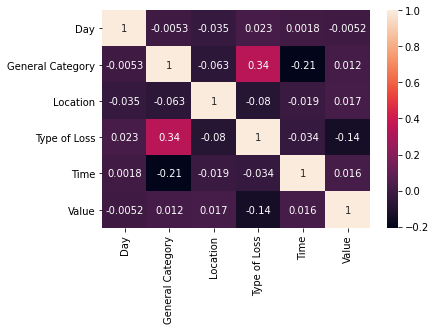

In [94]:
# correlation
# get df column to calculate corr
df_new = df[['Day', 'General Category', 'Location', 'Type of Loss', 'Time', 'Value']]

corrMatrix  = df_new.corr()
print(corrMatrix)

# plot corr
sns.heatmap(corrMatrix, annot=True)
plt.show()